<a href="https://colab.research.google.com/github/romaniuk-o/Python_Data_Science_HW4/blob/main/HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Нехай все населення ($N$ індивідів) ділиться на три групи: індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) — $S(t)$; заражені індивіди (infected) - $ I (t) $ (вони хворі самі і є носіями хвороби) і здорові індивіди, які мають імунітет до цієї хвороби (recovered) - $ R (t) $.

Приймемо, що

(1)$$S(t)+I(t)+R(t)=N$$        

Вважаємо, що коли кількість інфікованих перевищує певне фіксоване значення 
$I^∗$, швидкість зміни кількості схильних до хвороби індивідів буде пропорційно кількості найсхильніших індивідів.


(2)$${dS\over​dt}= -\alpha{S}$$

Тепер, коли кожен схильний до хвороби індивід зрештою занедужує і стає інфекційним, то швидкість зміни інфікованих індивідів - це різниця за одиницю часу між захворілими і тими, хто одужує.


(3)$${dI\over​dt}= \alpha{S}-\beta{I}$$

Постійні пропорційності $α$ и $β$ називають коефіцієнтами захворюваності та одужання відповідно.

Швидкість зміни кількості індивідів, що одужують:


(4)$${dR\over​dt}= \beta{I}$$

Щоб рішення відповідних рівнянь визначалися однозначно, необхідно задати початкові умови. Приймемо, що:
*   $α=0.5$
*   $β=0.3$
*   $N=1000000$
*   $S(0)=990000$
*   $I(0)=7000$
*   $R(0)=3000$
*   $t$0​, $t$f$​=0, 25$

Необхідно виконати:

1. Розв'язати диференціальне рівняння (2) та побудувати графік функції $S(t)$





In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [2]:
α = 0.5
𝛽 = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.149e-01 ...  2.415e+01  2.500e+01]
        y: [[ 9.900e+05  9.347e+05 ...  5.677e+00  3.713e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f86d9ef1df0>
 t_events: None
 y_events: None
     nfev: 98
     njev: 0
      nlu: 0


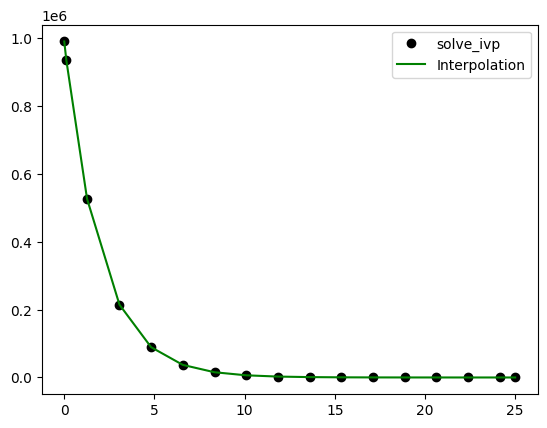

In [3]:
def dSdt(t, S):
    return - α * S

soln_1 = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(soln_1)

t_1, s_1 = soln_1.t, soln_1.y[0]
z_1, = soln_1.sol(t_1)

plt.plot(t_1, s_1, 'o', color='k', label='solve_ivp')
plt.plot(t_1, z_1, color = 'g', label='Interpolation')

plt.legend()
plt.show()



2. Розв'язати диференціальне рівняння (3) та побудувати графік функції 
$I(t)$


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.420e-02 ...  2.360e+01  2.500e+01]
        y: [[ 7.000e+03  1.396e+04 ...  2.075e+03  1.368e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f86d9cc9d00>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0


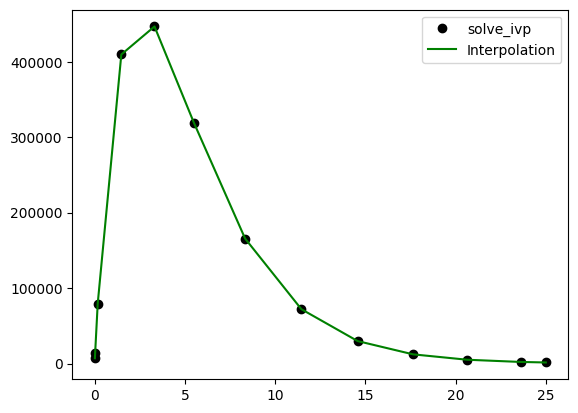

In [4]:
def dSdt(t, I):
    return α * soln_1.sol(t) - 𝛽 * I


soln_2 = solve_ivp(dSdt, (t0, tf), [I0], dense_output=True)
print(soln_2)

t_2, s_2 = soln_2.t, soln_2.y[0]
z_2, = soln_2.sol(t_2)

plt.plot(t_2, s_2, 'o', color='k', label='solve_ivp')
plt.plot(t_2, z_2, color = 'g', label='Interpolation')

plt.legend()
plt.show()


3. Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію interp1d) та побудувати графік функції $R(t)$

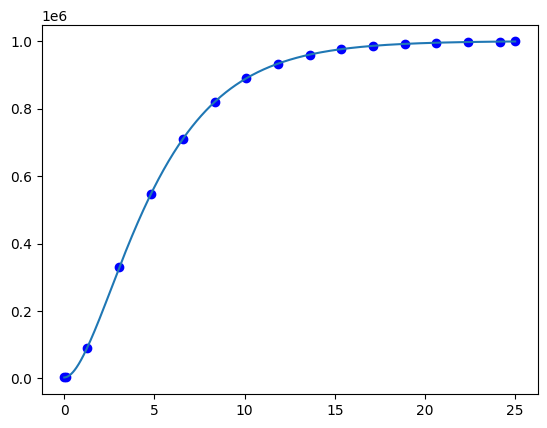

In [10]:
S_t = interp1d(t_1, s_1, kind='cubic')
I_t = interp1d(t_2, s_2, kind='cubic')
R = N0 - S_t(t_1) - I_t(t_1)
R

plt.plot(t_1, R, 'o',  color='b' )

t_new = np.linspace(0, 25, 1000)
f = interp1d(t_1, R, kind='cubic')
plt.plot(t_new, f(t_new))


4. Побудувати всі три графіки 
$S(t), I(t) і R(t)$ на одній області відображення

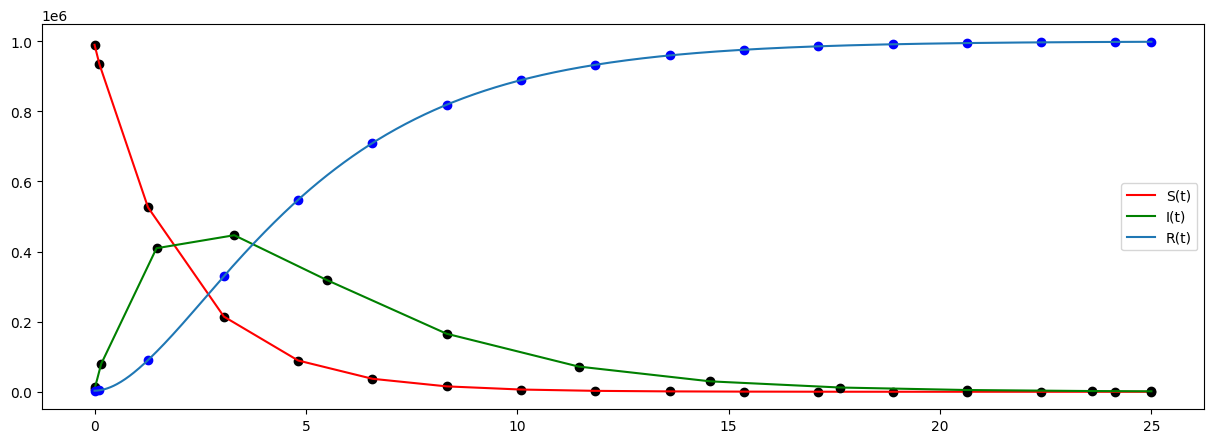

In [18]:
plt.subplots(figsize=(15, 5))

plt.plot(t_1, s_1, 'o', color='k')
plt.plot(t_1, z_1, color = 'r', label='S(t)')

plt.plot(t_2, s_2, 'o', color='k')
plt.plot(t_2, z_2, color = 'g', label='I(t)')


plt.plot(t_1, R, 'o',  color='b' )
plt.plot(t_new, f(t_new),label='R(t)')

plt.legend()
plt.show()
